In [1]:
#selected_feature = 'sq_ft'
#selected_feature = 'property_age'
selected_features = ['bedrooms', 'bathrooms']

In [2]:
# Python program to generate WordCloud

# importing all necessary modules
import json

from matplotlib.pyplot import title
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

#df_original = vv.get_combined_dataset(HOW="left", early_duplicates=True, row_limit=500)
df_original = vv.get_combined_dataset(HOW="left", early_duplicates=True)
df_original = vv.prettify_dataset(df_original)
df_original = vv.dataset_numerify_columns(df_original, ['Price', selected_features[0], selected_features[1]])

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764


In [3]:
df = df_original.loc[:, ['Price', 'borough_name', 'analyticsProperty.propertyType', selected_features[0], selected_features[1]]]
df.tail(10)

,Price,borough_name,analyticsProperty.propertyType,bedrooms,bathrooms
ids,,,,,
120321923,440000.0,Hillingdon,Houses,2.0,1.0
120501506,440000.0,Hillingdon,Houses,3.0,1.0
123906503,440000.0,Hillingdon,Flats / Apartments,2.0,2.0
119011196,440000.0,Hillingdon,Houses,3.0,1.0
120100592,440000.0,Hillingdon,Flats / Apartments,2.0,1.0
121041542,440000.0,Hillingdon,Houses,3.0,1.0
113743676,440000.0,Hillingdon,Houses,3.0,1.0
120696125,440000.0,Hillingdon,Houses,3.0,1.0
123577607,440000.0,Hillingdon,Flats / Apartments,2.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24139 entries, 85780593 to 114438299
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           24103 non-null  float64
 1   borough_name                    24139 non-null  object 
 2   analyticsProperty.propertyType  24139 non-null  object 
 3   bedrooms                        23227 non-null  float64
 4   bathrooms                       22366 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


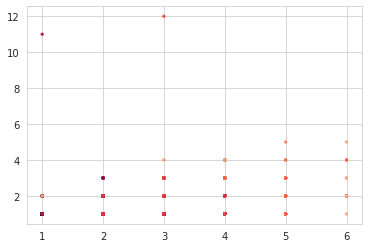

In [5]:
#df.plot(kind="scatter", x=selected_features[0], y=selected_features[1],"Price")
plt.scatter(df[selected_features[0]], y=df[selected_features[1]], s=5, c=df['Price'])

In [6]:
df[['borough_name', 'analyticsProperty.propertyType']].value_counts()

borough_name   analyticsProperty.propertyType
Tower Hamlets  Flats / Apartments                1656
Southwark      Flats / Apartments                1528
Wandsworth     Flats / Apartments                1464
Lambeth        Flats / Apartments                1433
Newham         Flats / Apartments                1371
                                                 ... 
Lewisham       Land                                 1
Redbridge      Land                                 1
Croydon        Character Property                   1
Bexley         Flats / Apartments                   1
Merton         Not Specified                        1
Length: 95, dtype: int64

analyticsProperty.propertyType
Flats / Apartments                17554
Houses                             6177
Bungalows                           314
Not Specified                        88
Land                                  5
Character Property                    1
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

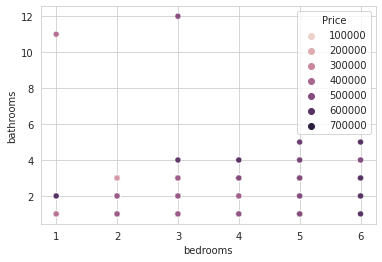

In [7]:
import seaborn as sns

print(df[['analyticsProperty.propertyType']].value_counts())
sns.scatterplot(selected_features[0], selected_features[1], hue='Price', data=df)


In [8]:
borough_names_df = df_original[['borough_name']].value_counts()
borough_names_df
borough_names = [x[0] for x in list(borough_names_df.index)]

In [9]:
#borough_names = list(df.borough_name.unique())
propertyType_names = list(df['analyticsProperty.propertyType'].unique())
propertyType_names = ['Flats / Apartments','Houses']
i = -1
h = -1
#propertyType_names

Newham


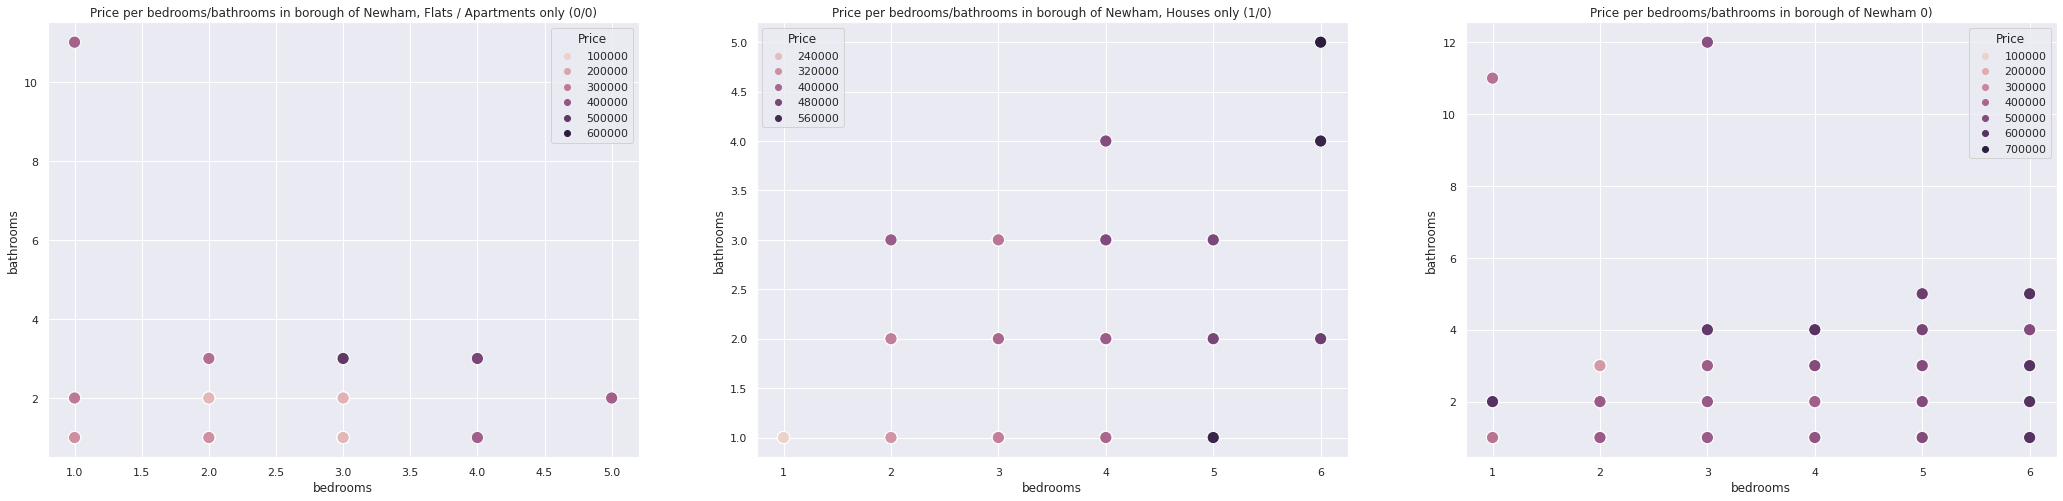

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set(rc={"figure.figsize":(36, 8)})
#sns.set()

#define plotting region (2 rows, 2 columns)
#fig, axes = plt.subplots(2, 2)
fig, axes = plt.subplots(1, 3)

h = (h+1)%len(borough_names)

print(borough_names[h])
df_by_borough1 = df.loc[(df['borough_name'] == borough_names[h]) & (df['analyticsProperty.propertyType'] == propertyType_names[0]), :]
df_by_borough2 = df.loc[(df['borough_name'] == borough_names[h]) & (df['analyticsProperty.propertyType'] == propertyType_names[1]), :]

#create boxplot in each subplot
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='Price', data=df_by_borough1, ax=axes[0], s=150).\
    set(title=f"Price per {selected_features[0]}/{selected_features[1]} in borough of {borough_names[h]}, {propertyType_names[0]} only ({0}/{h})")
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='Price', data=df_by_borough2, ax=axes[1], s=150).\
    set(title=f"Price per {selected_features[0]}/{selected_features[1]} in borough of {borough_names[h]}, {propertyType_names[1]} only ({1}/{h})")
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='Price', data=df, ax=axes[2], s=150).\
    set(title=f"Price per {selected_features[0]}/{selected_features[1]} in borough of {borough_names[h]} {h})")
#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
#sns.boxplot(data=df, x='team', y='rebounds', ax=axes[0,2])
#sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])
plt.show()

borough_name  analyticsProperty.propertyType
Newham        Flats / Apartments                1371
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


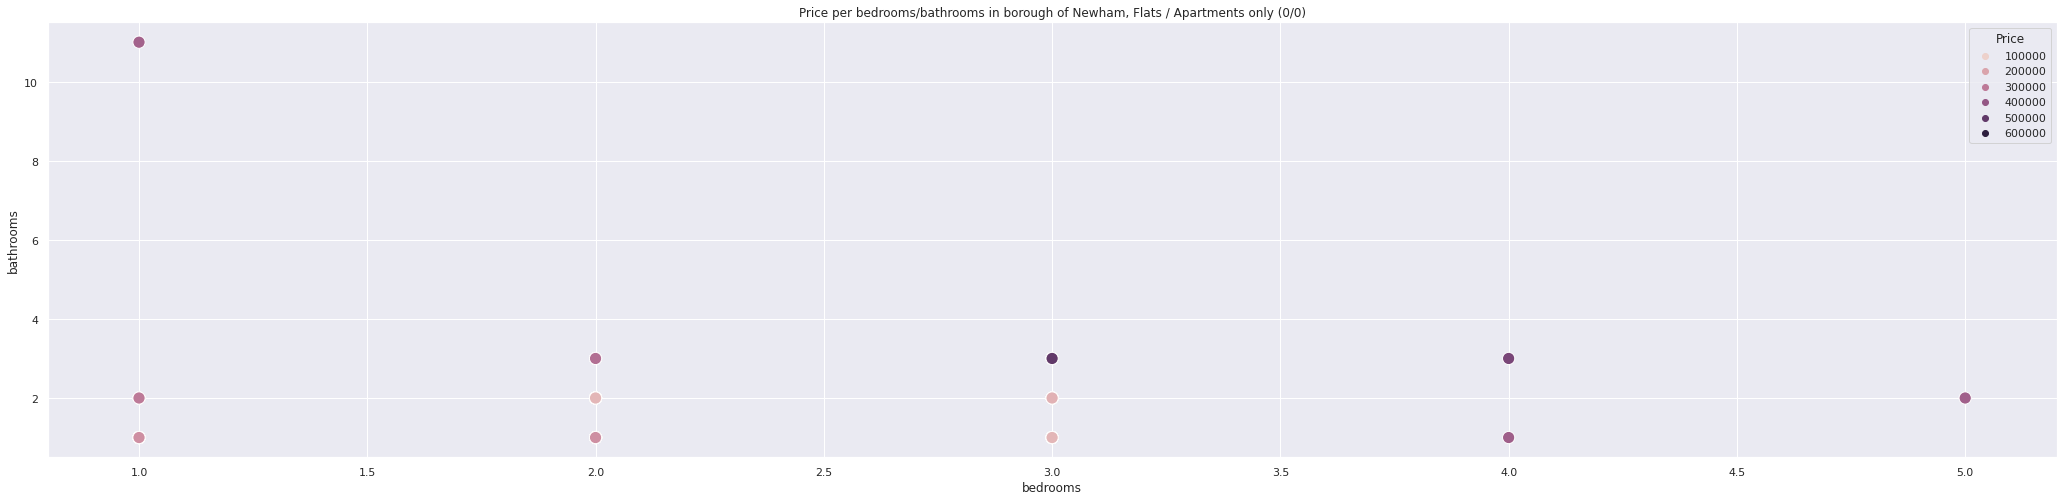

borough_name  analyticsProperty.propertyType
Croydon       Flats / Apartments                669
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


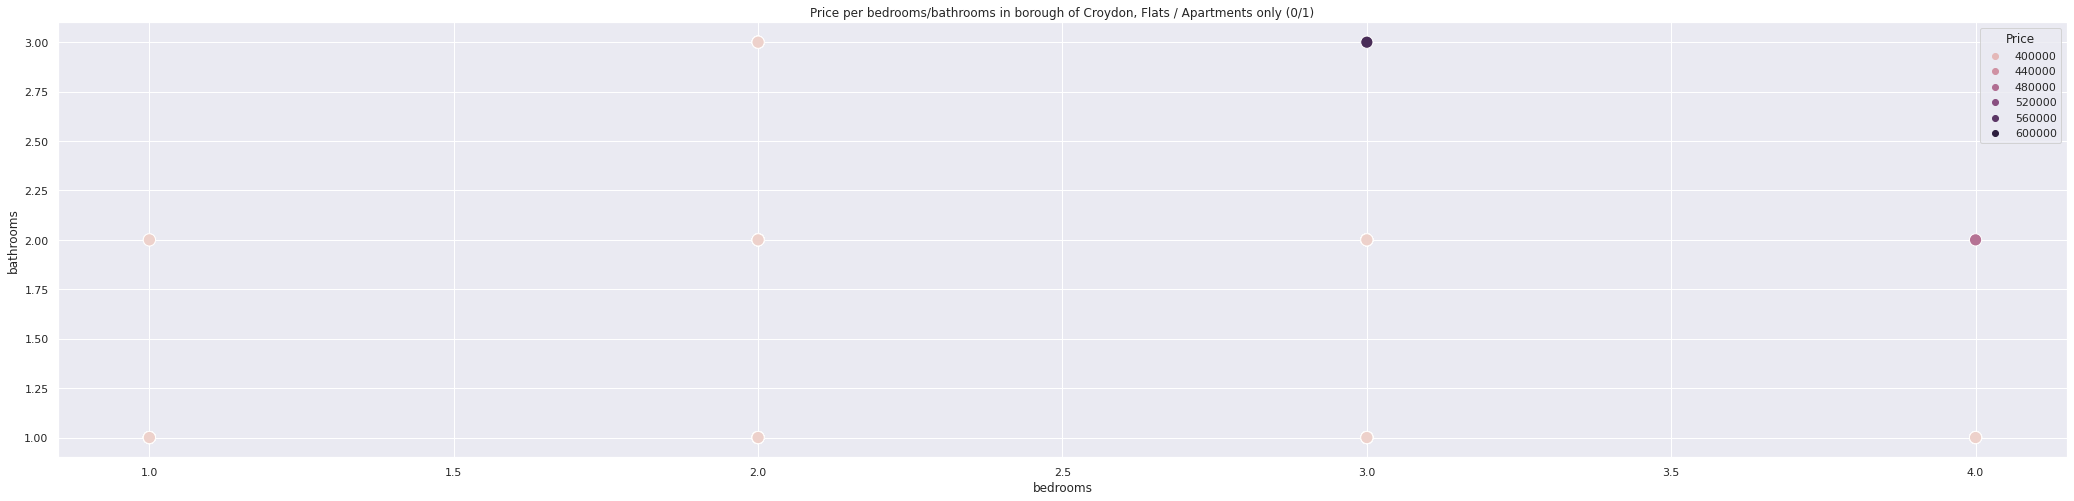

borough_name   analyticsProperty.propertyType
Tower Hamlets  Flats / Apartments                1656
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


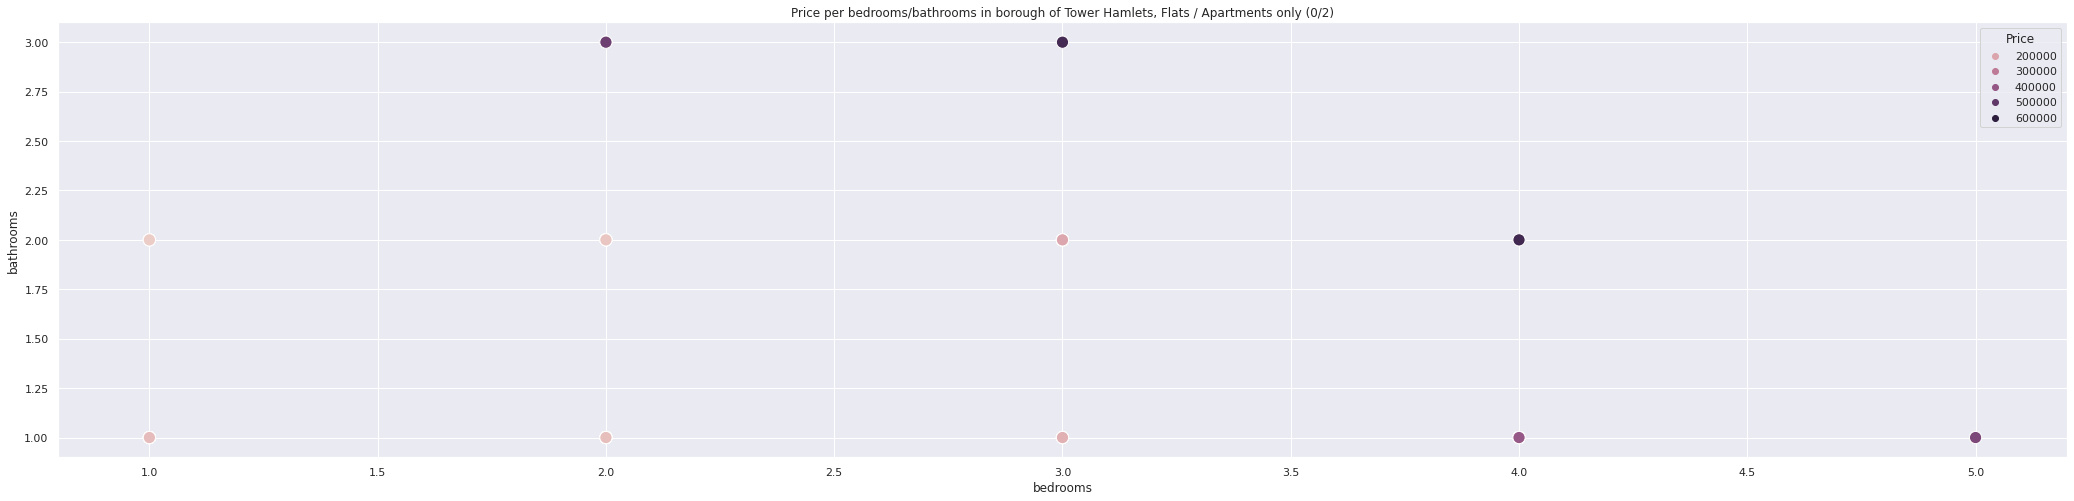

borough_name  analyticsProperty.propertyType
Southwark     Flats / Apartments                1528
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


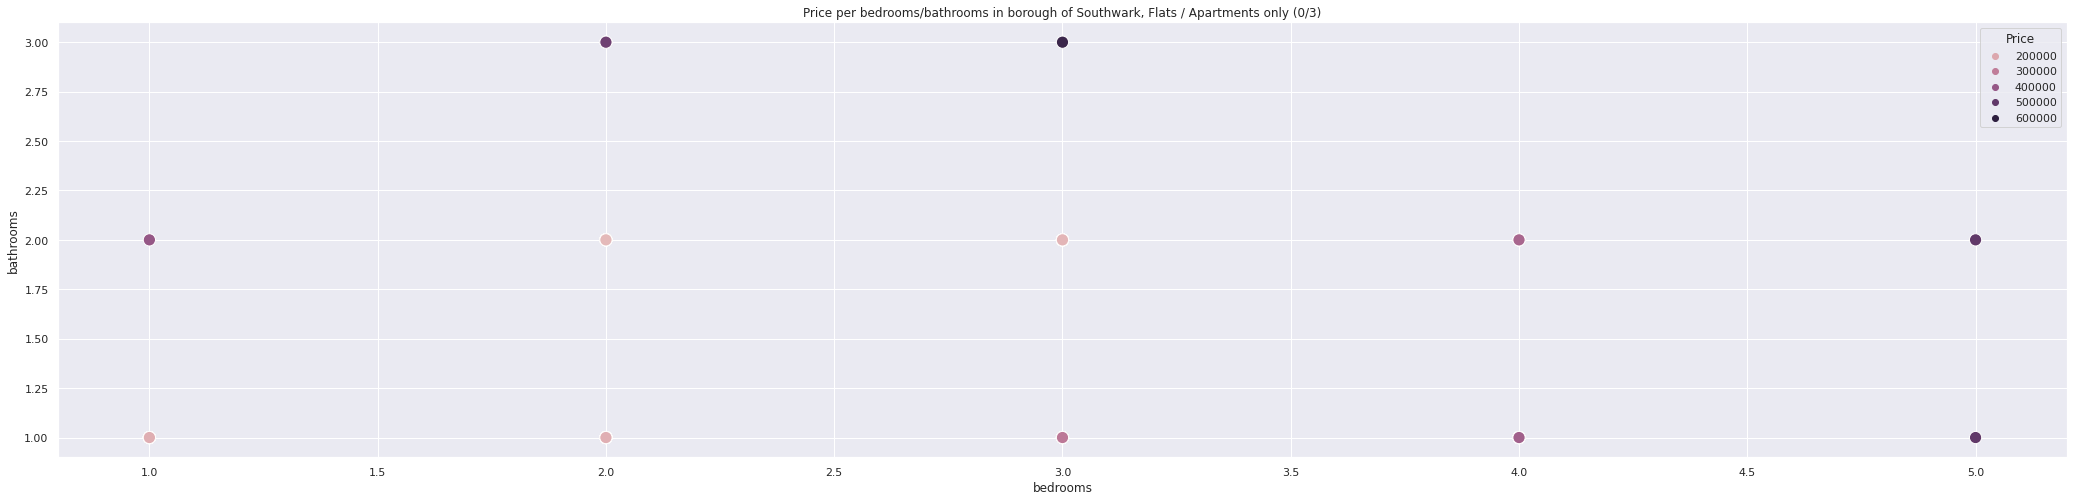

borough_name  analyticsProperty.propertyType
Lambeth       Flats / Apartments                1433
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


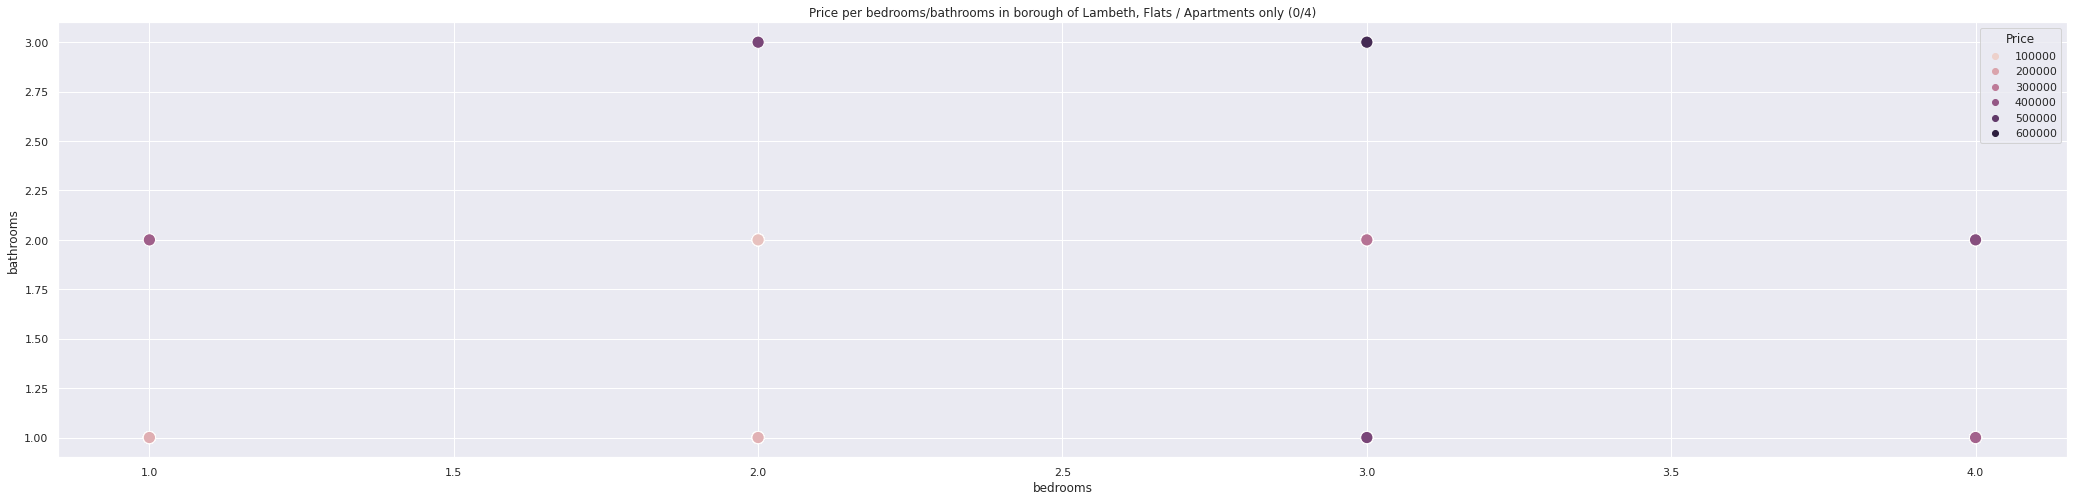

borough_name  analyticsProperty.propertyType
Wandsworth    Flats / Apartments                1464
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


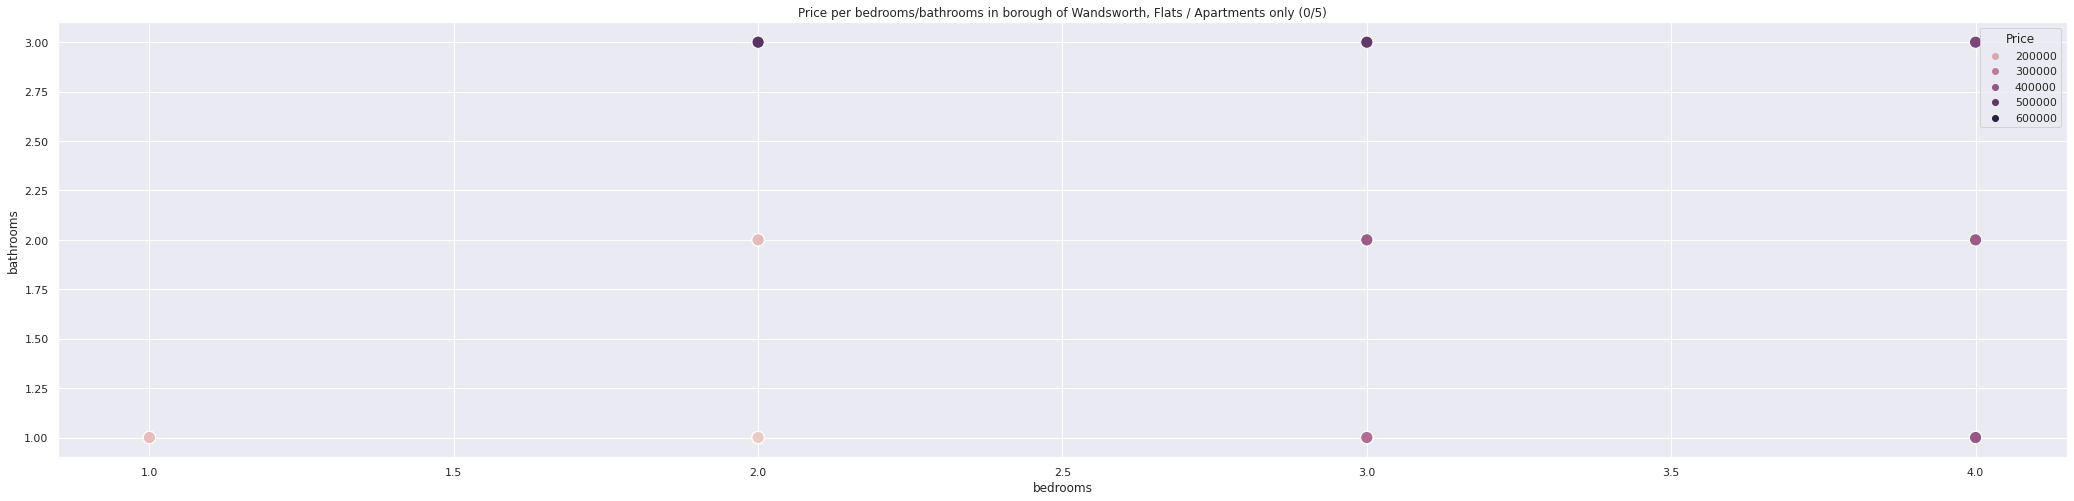

borough_name  analyticsProperty.propertyType
Ealing        Flats / Apartments                1015
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


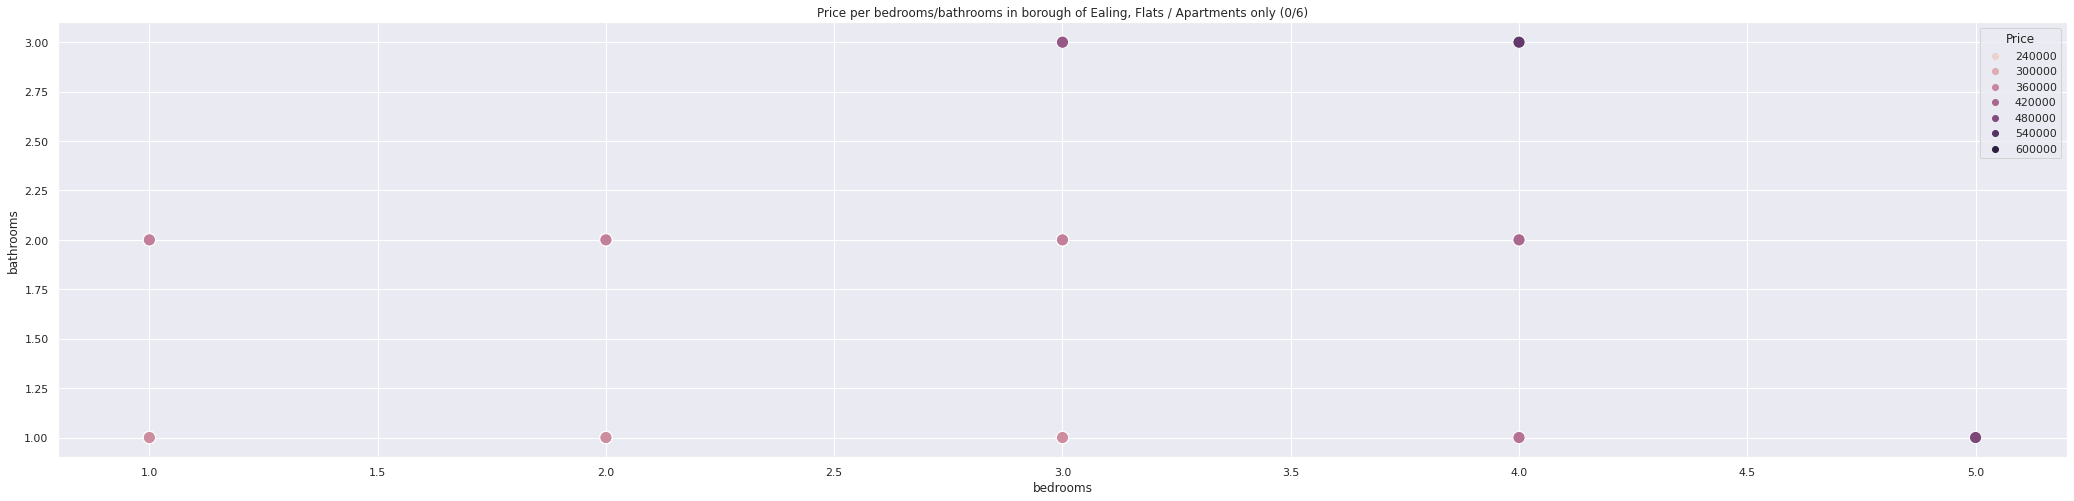

borough_name    analyticsProperty.propertyType
Waltham Forest  Flats / Apartments                907
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


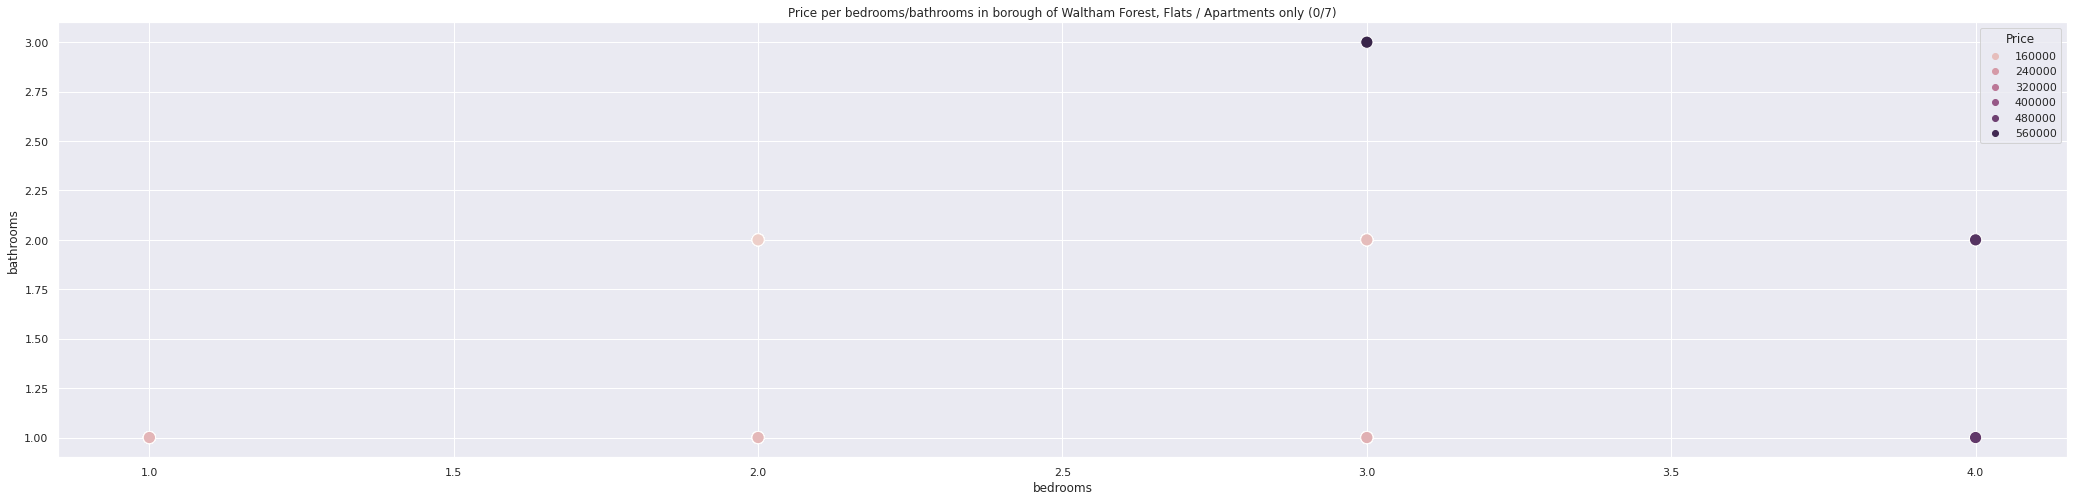

borough_name  analyticsProperty.propertyType
Redbridge     Flats / Apartments                645
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


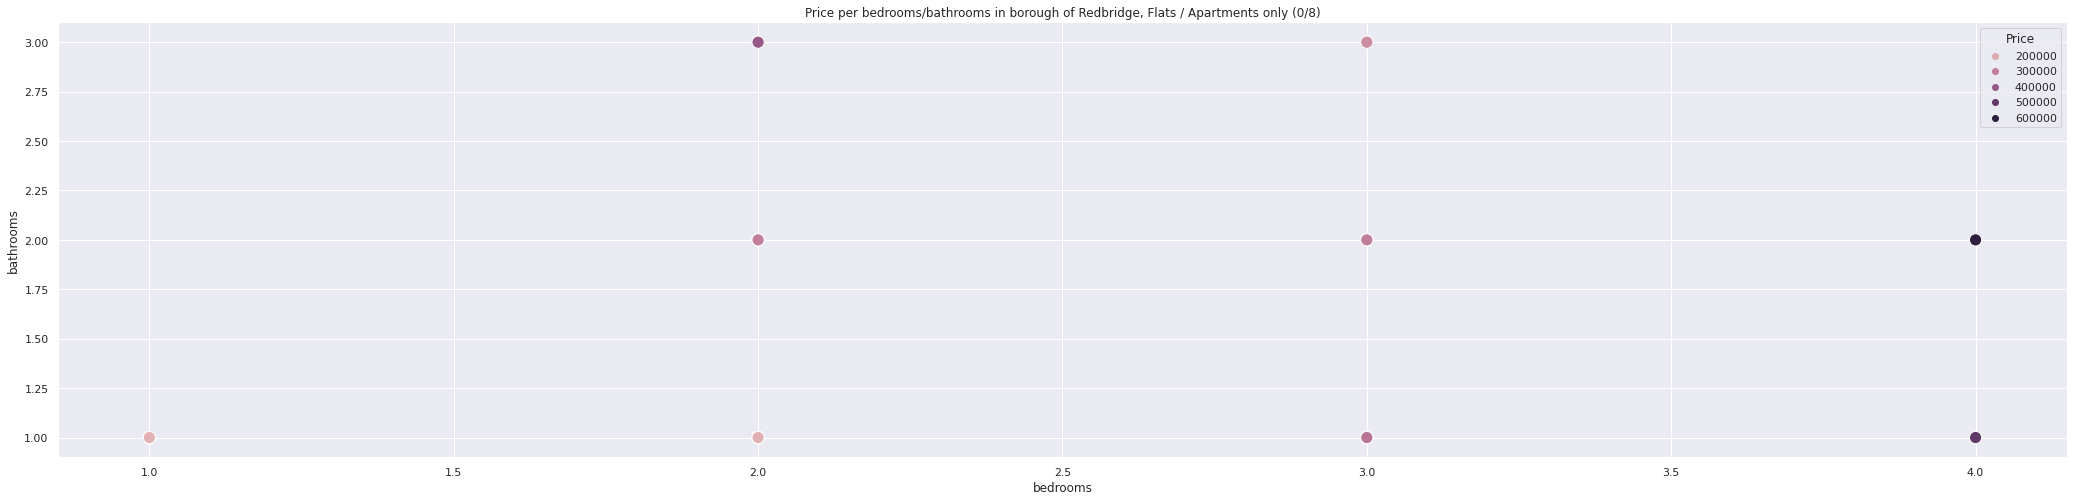

borough_name  analyticsProperty.propertyType
Lewisham      Flats / Apartments                1064
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


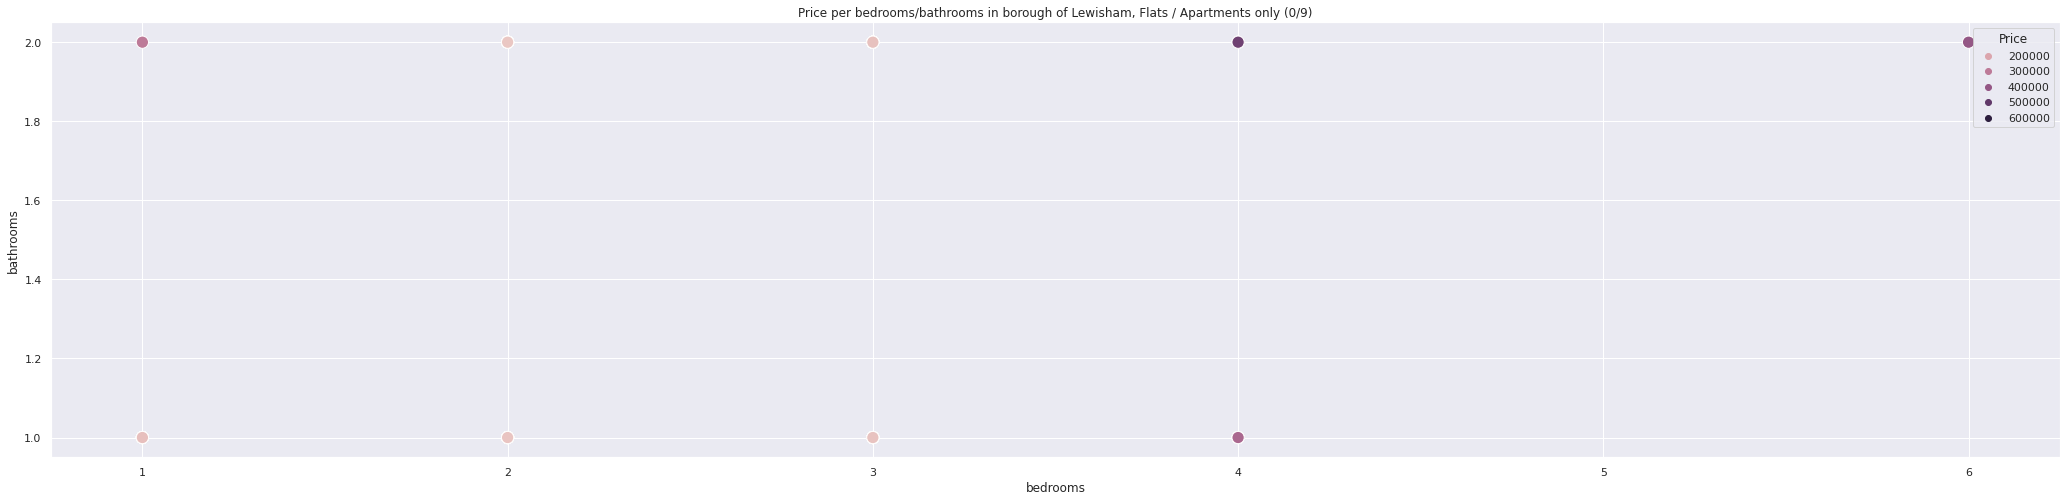

borough_name          analyticsProperty.propertyType
Kingston upon Thames  Flats / Apartments                866
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


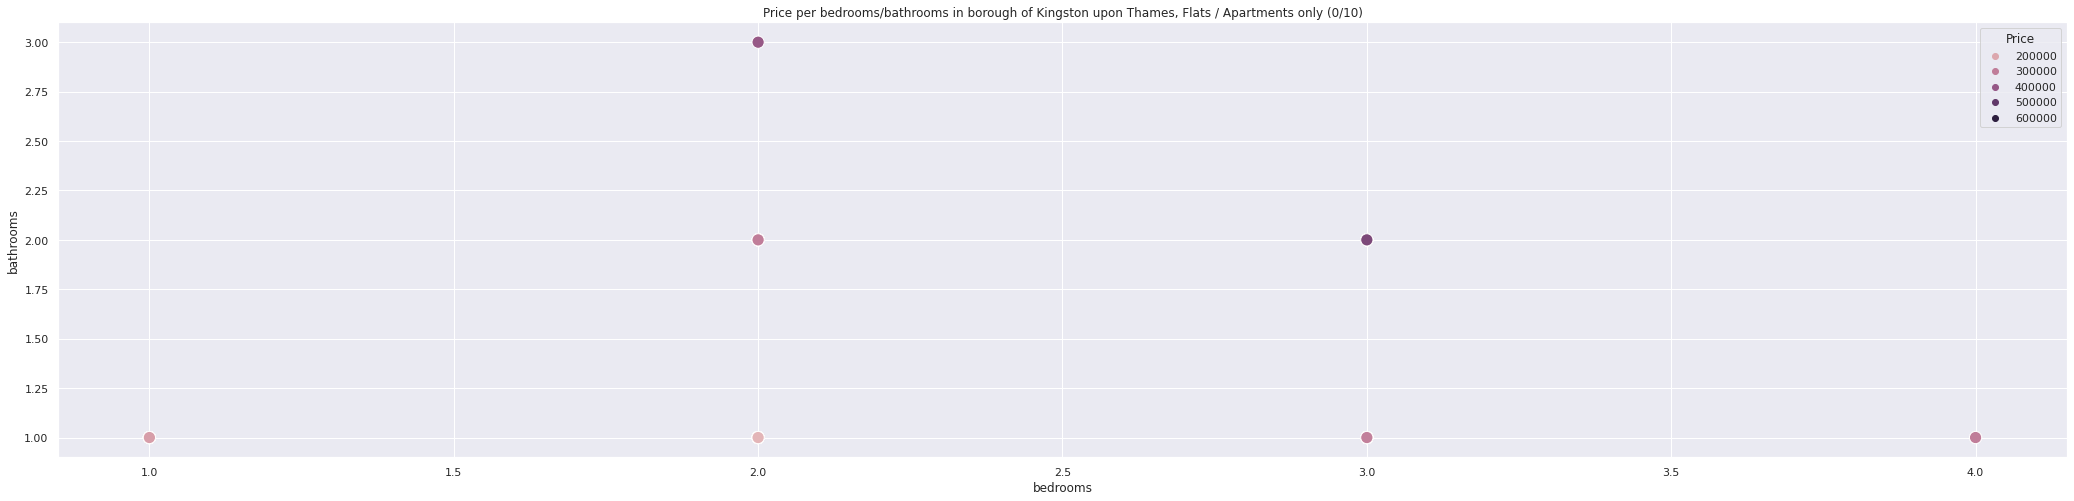

borough_name          analyticsProperty.propertyType
Richmond upon Thames  Flats / Apartments                928
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


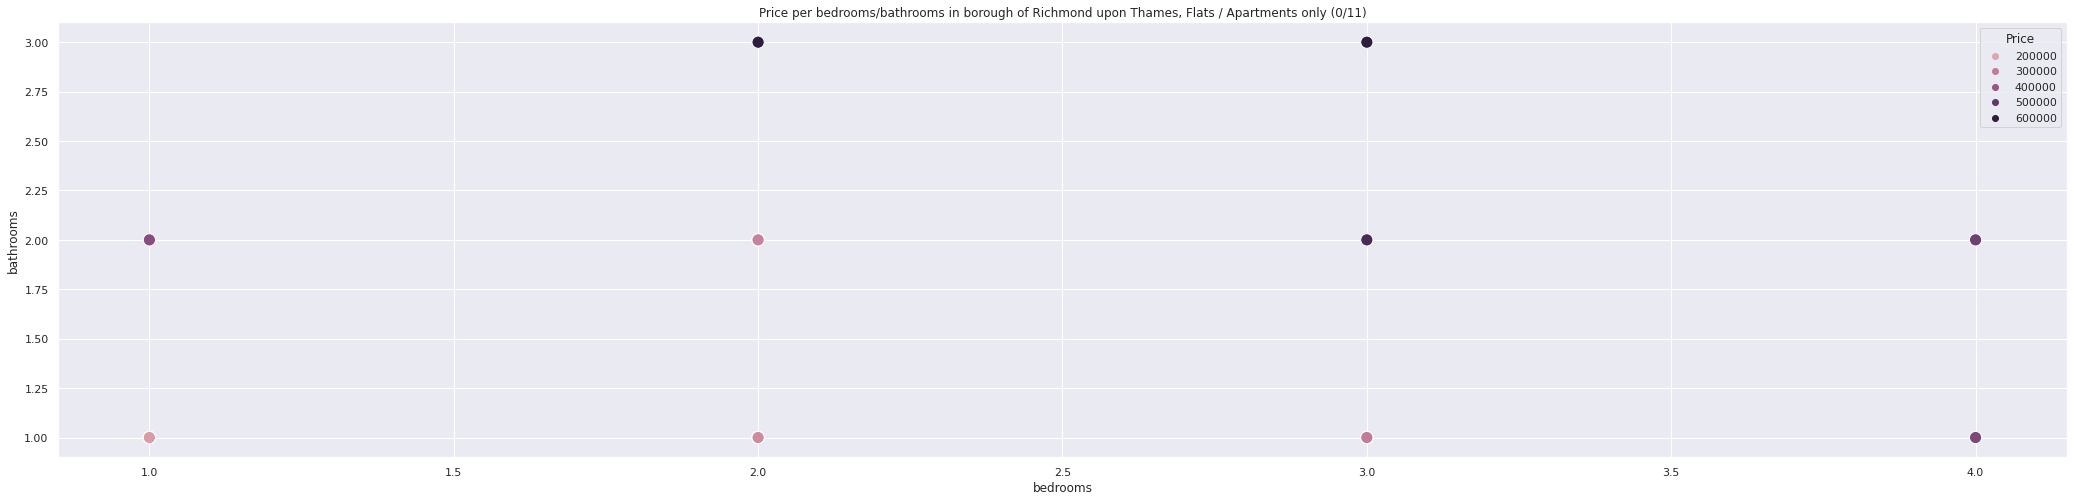

borough_name  analyticsProperty.propertyType
Hounslow      Flats / Apartments                784
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


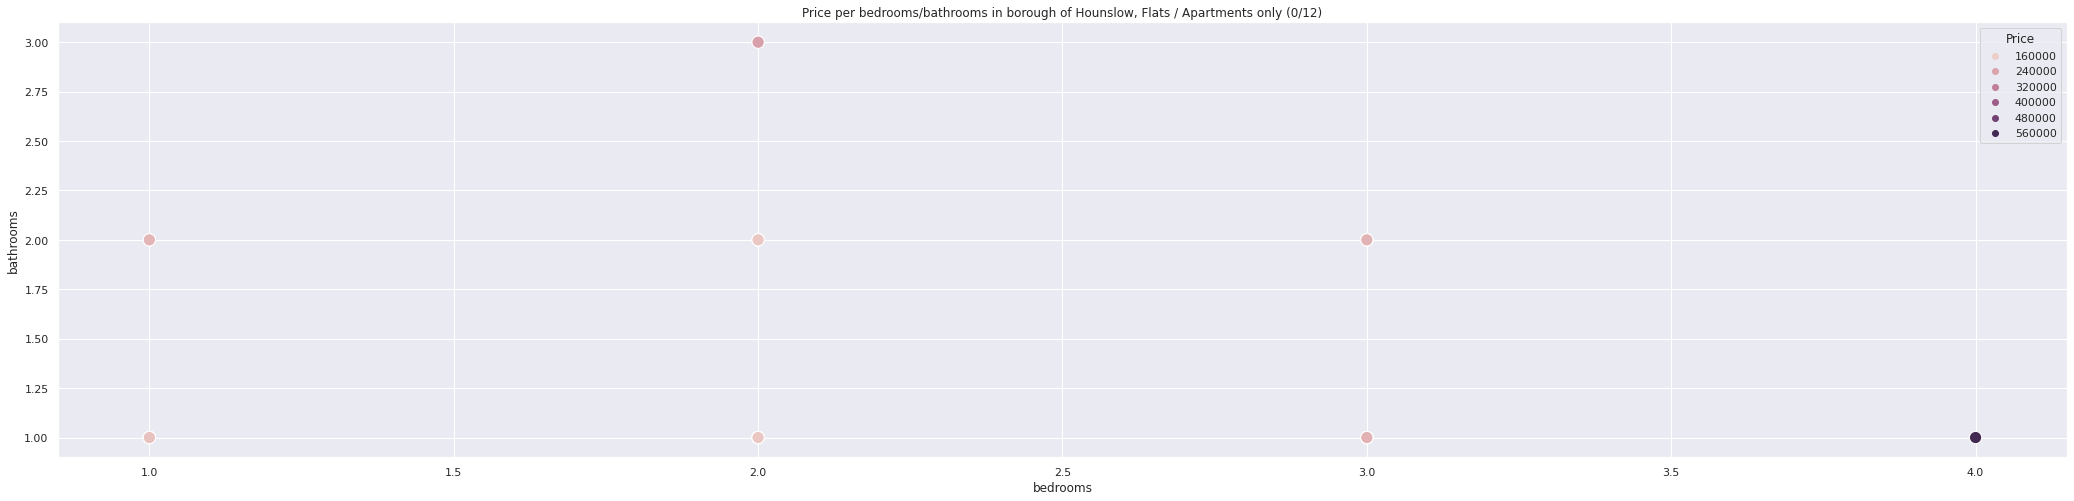

borough_name  analyticsProperty.propertyType
Sutton        Flats / Apartments                614
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


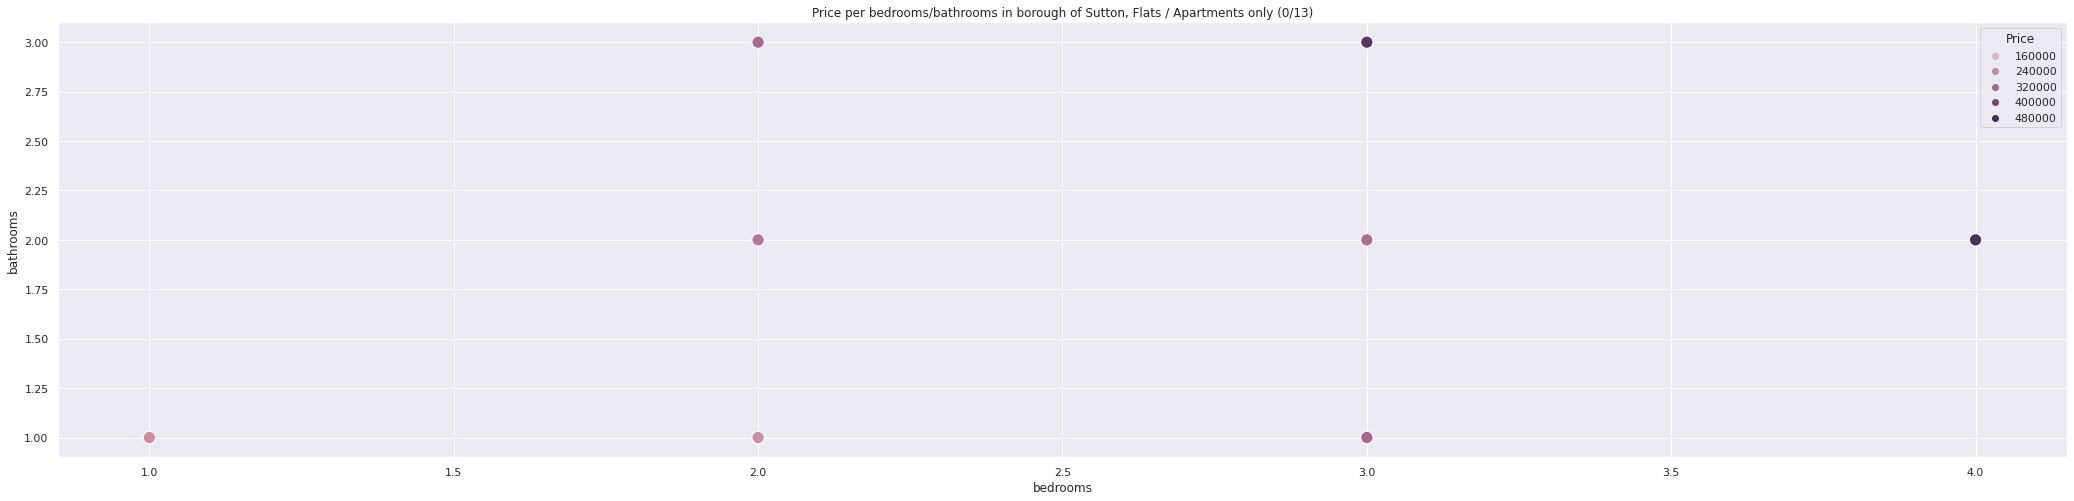

borough_name  analyticsProperty.propertyType
Merton        Flats / Apartments                762
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


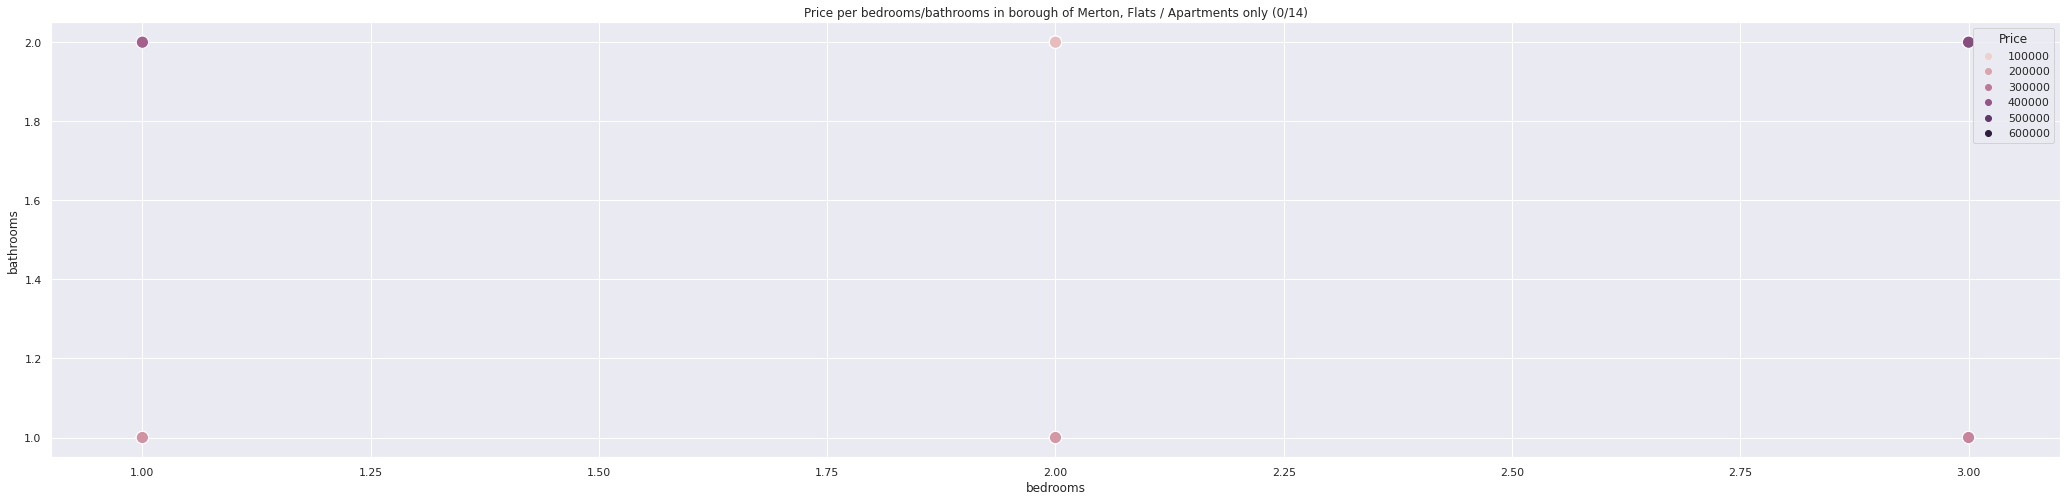

borough_name  analyticsProperty.propertyType
Hillingdon    Flats / Apartments                75
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


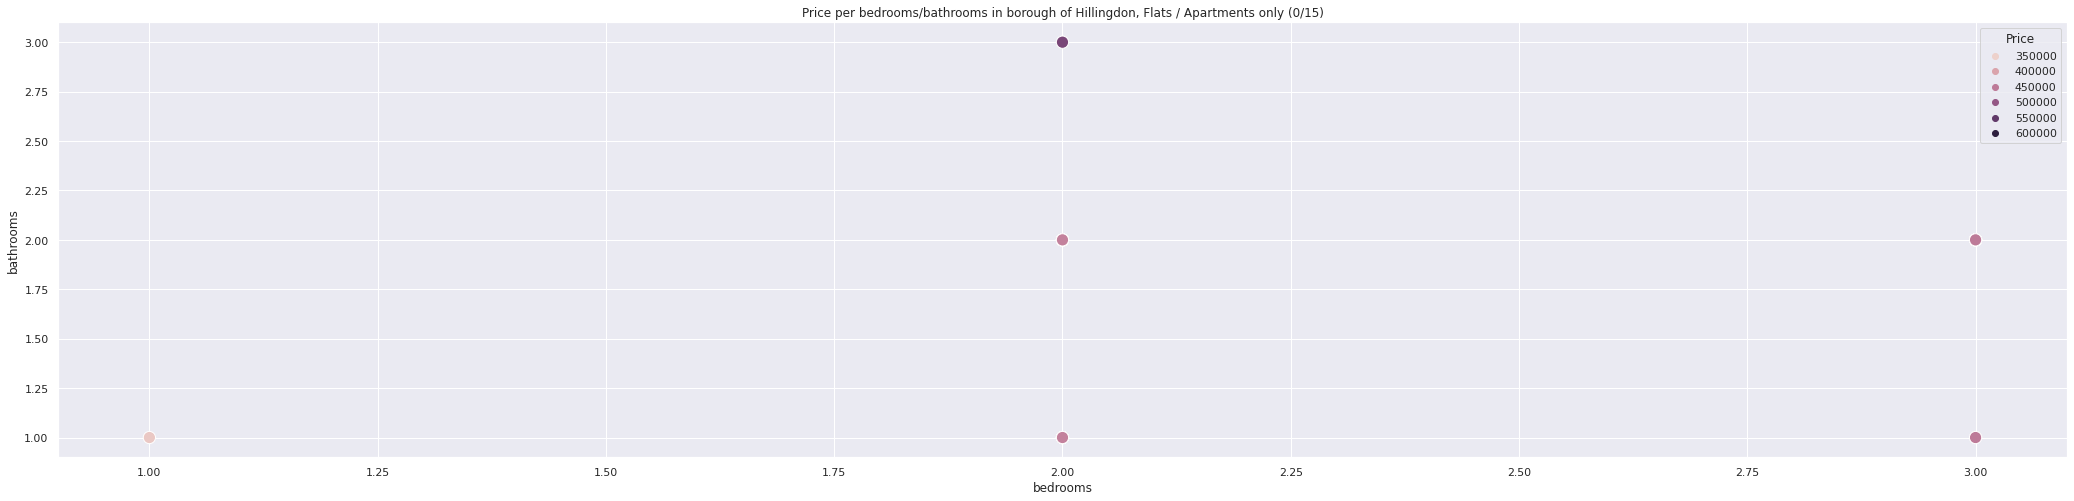

borough_name  analyticsProperty.propertyType
Westminster   Flats / Apartments                670
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


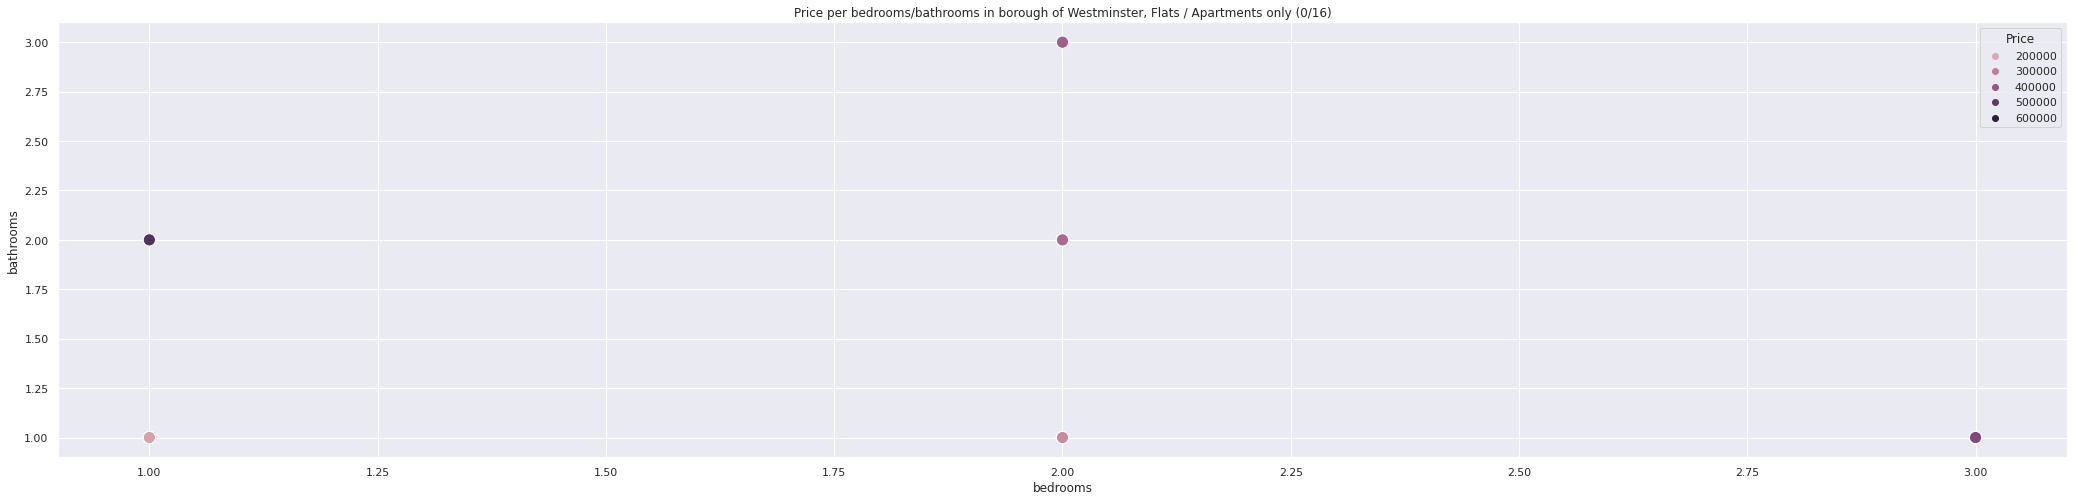

borough_name  analyticsProperty.propertyType
Greenwich     Flats / Apartments                318
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


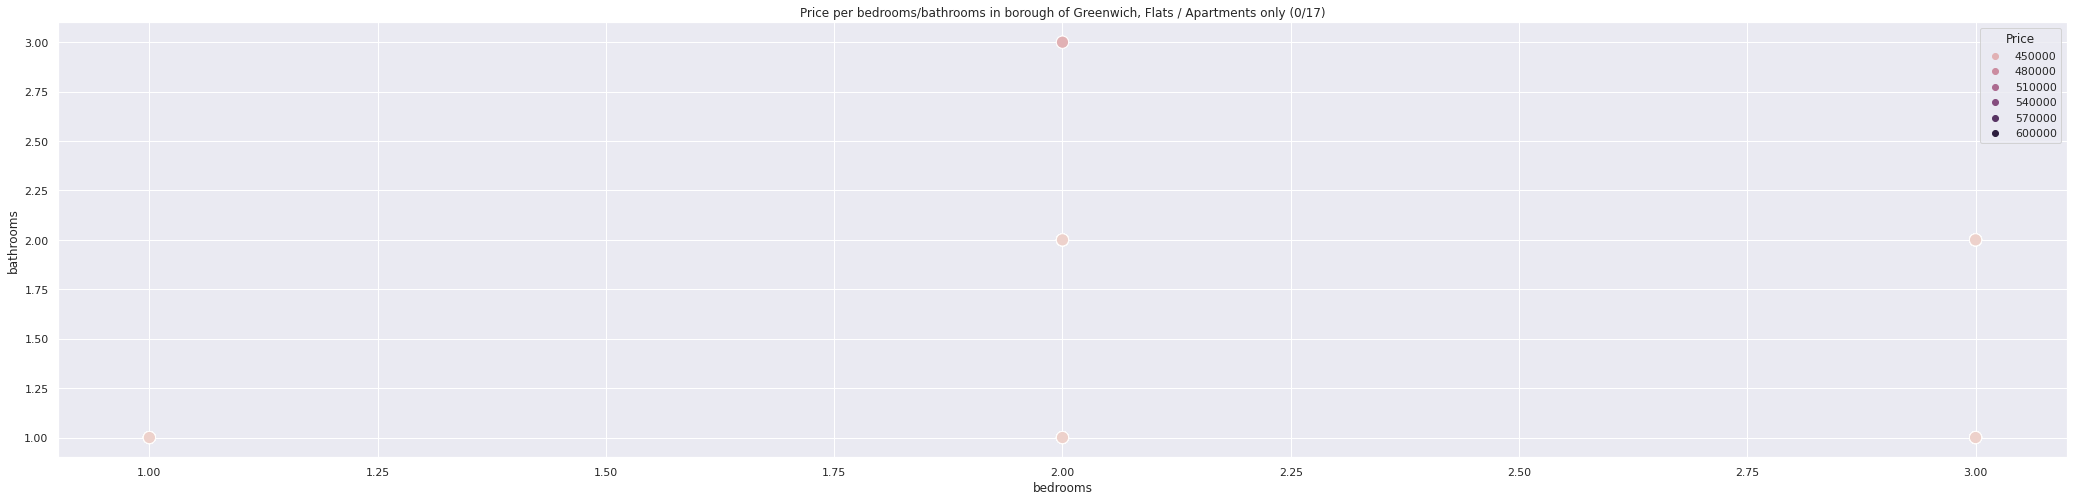

borough_name  analyticsProperty.propertyType
Havering      Flats / Apartments                17
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


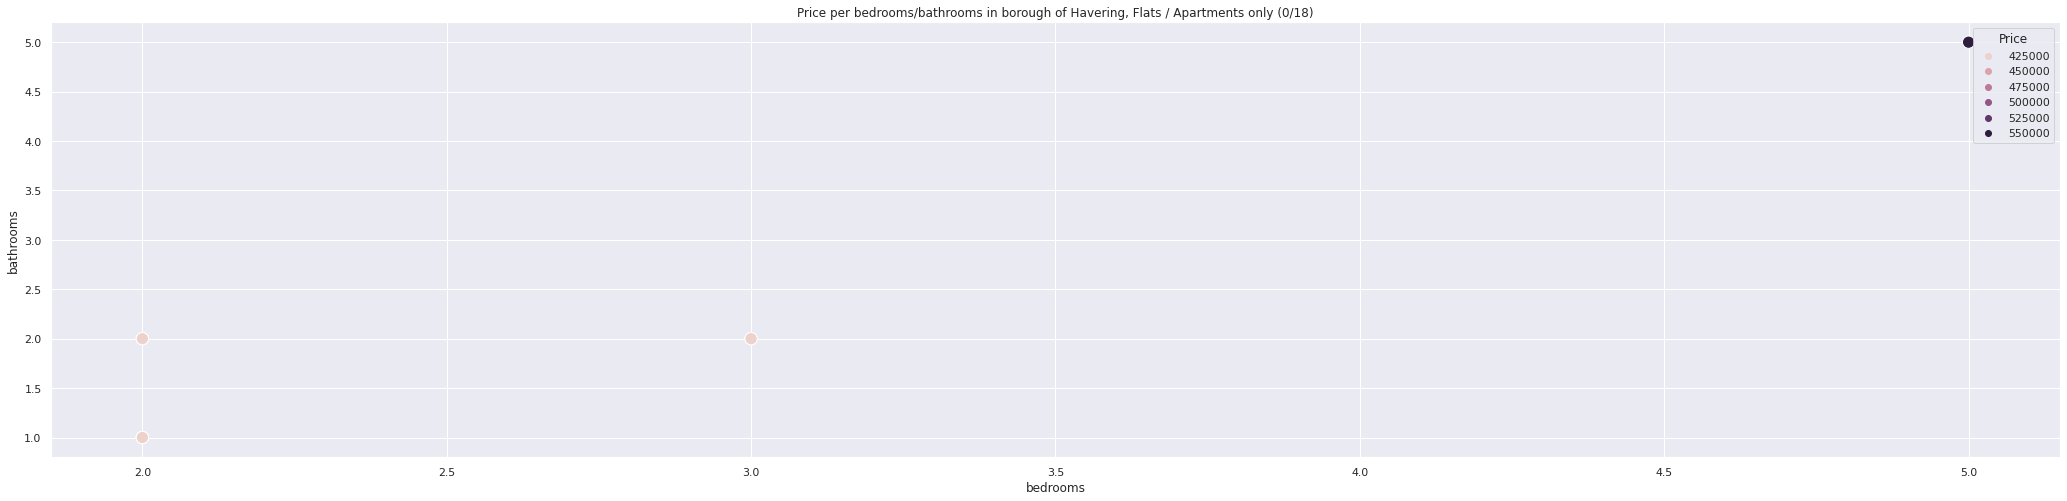

borough_name            analyticsProperty.propertyType
Kensington and Chelsea  Flats / Apartments                479
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


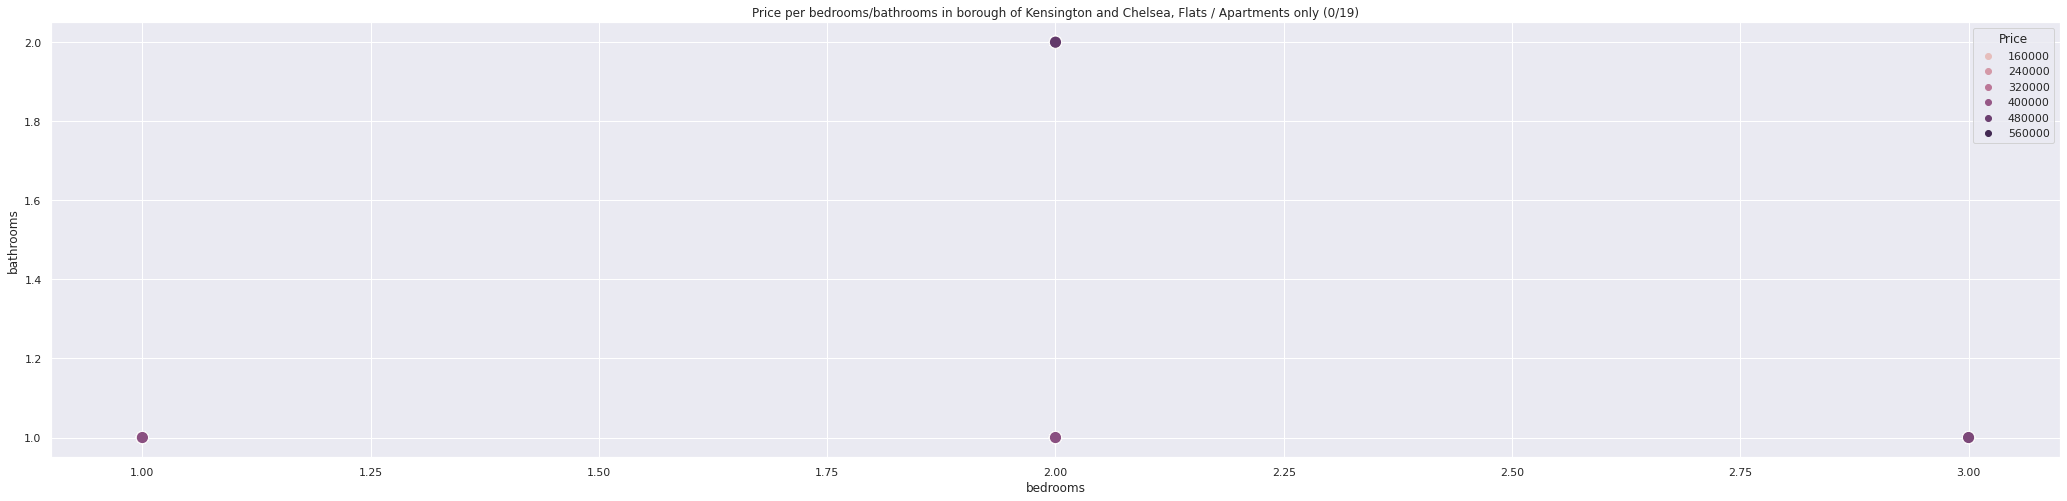

borough_name  analyticsProperty.propertyType
Enfield       Flats / Apartments                98
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


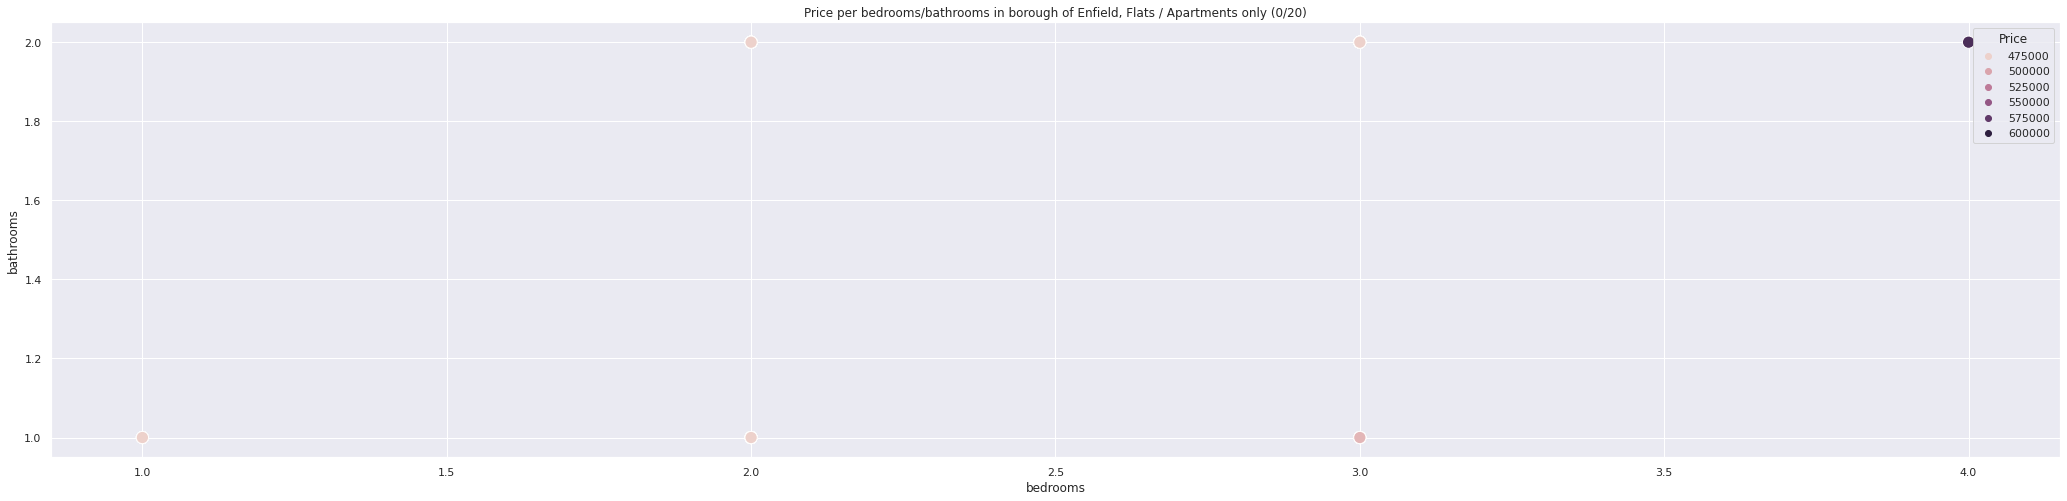

borough_name  analyticsProperty.propertyType
Bexley        Flats / Apartments                1
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


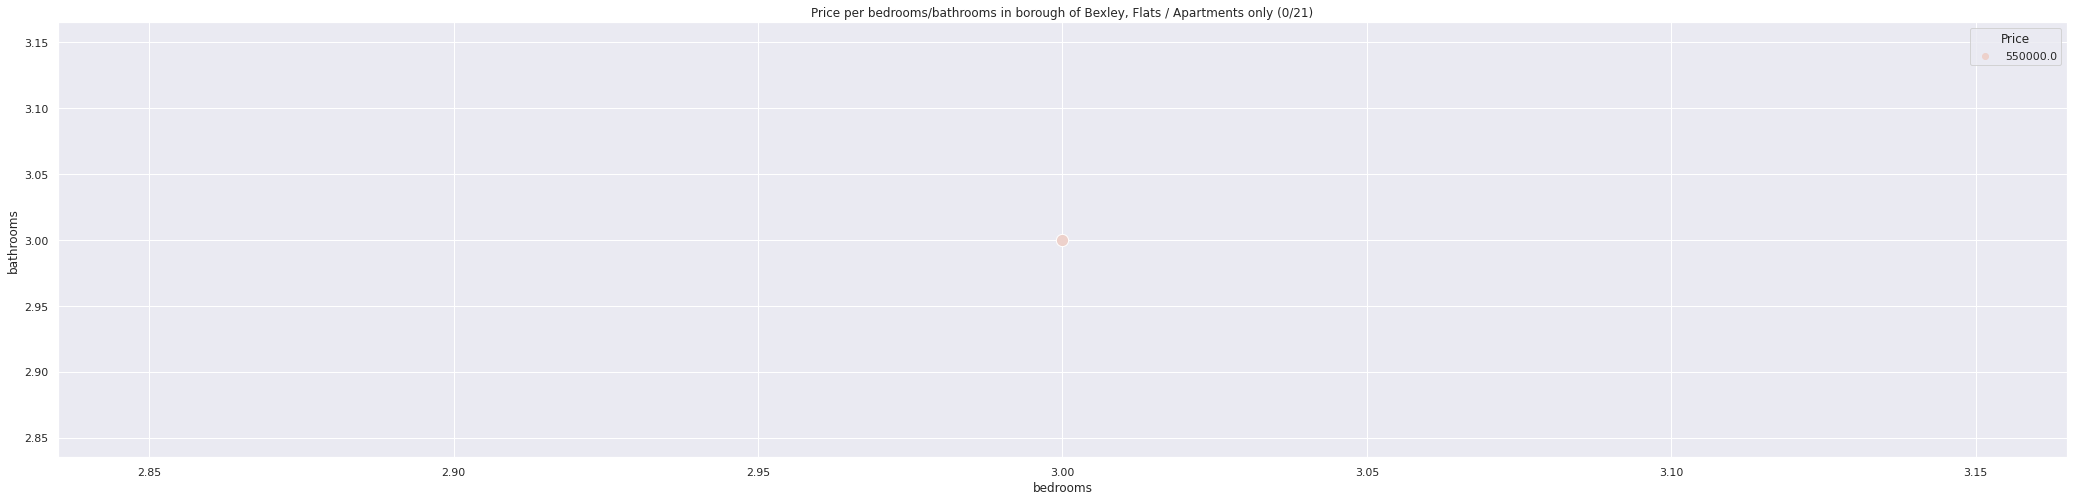

borough_name  analyticsProperty.propertyType
Barnet        Flats / Apartments                78
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


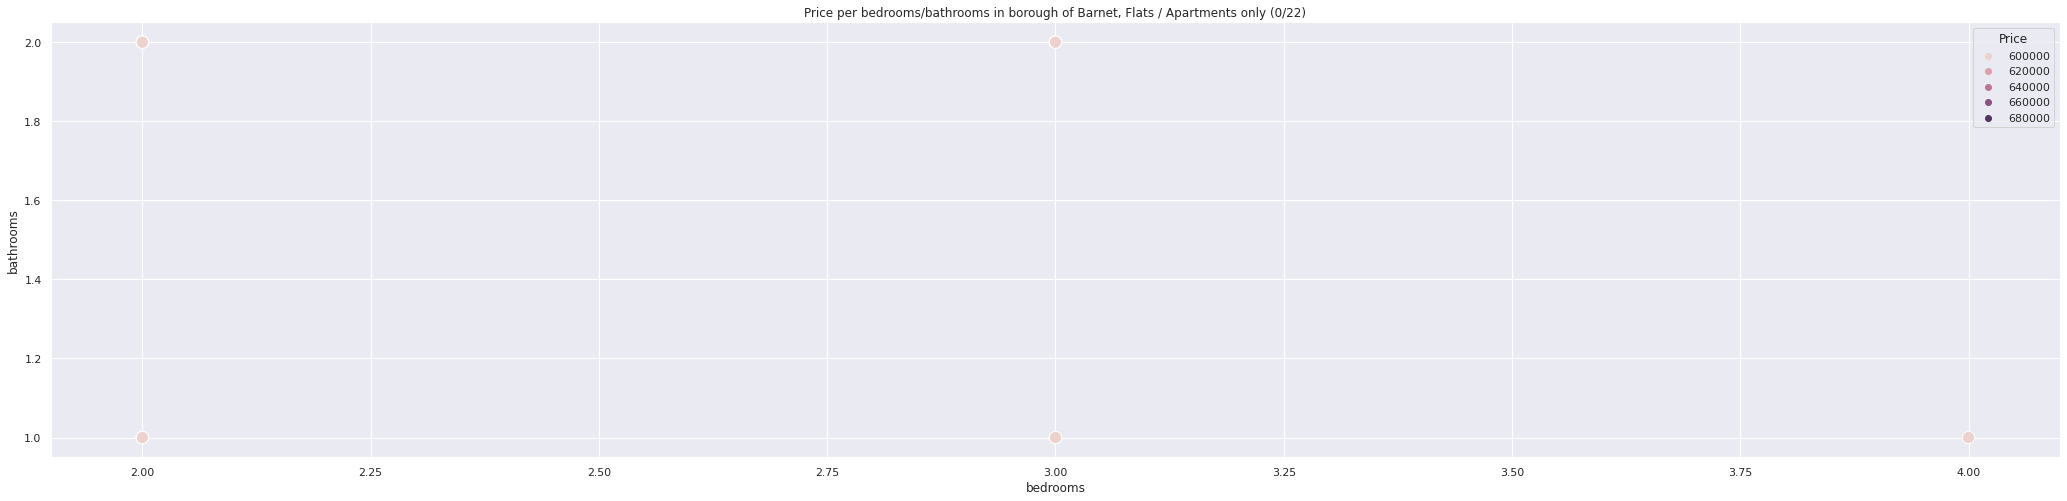

Series([], dtype: int64)


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


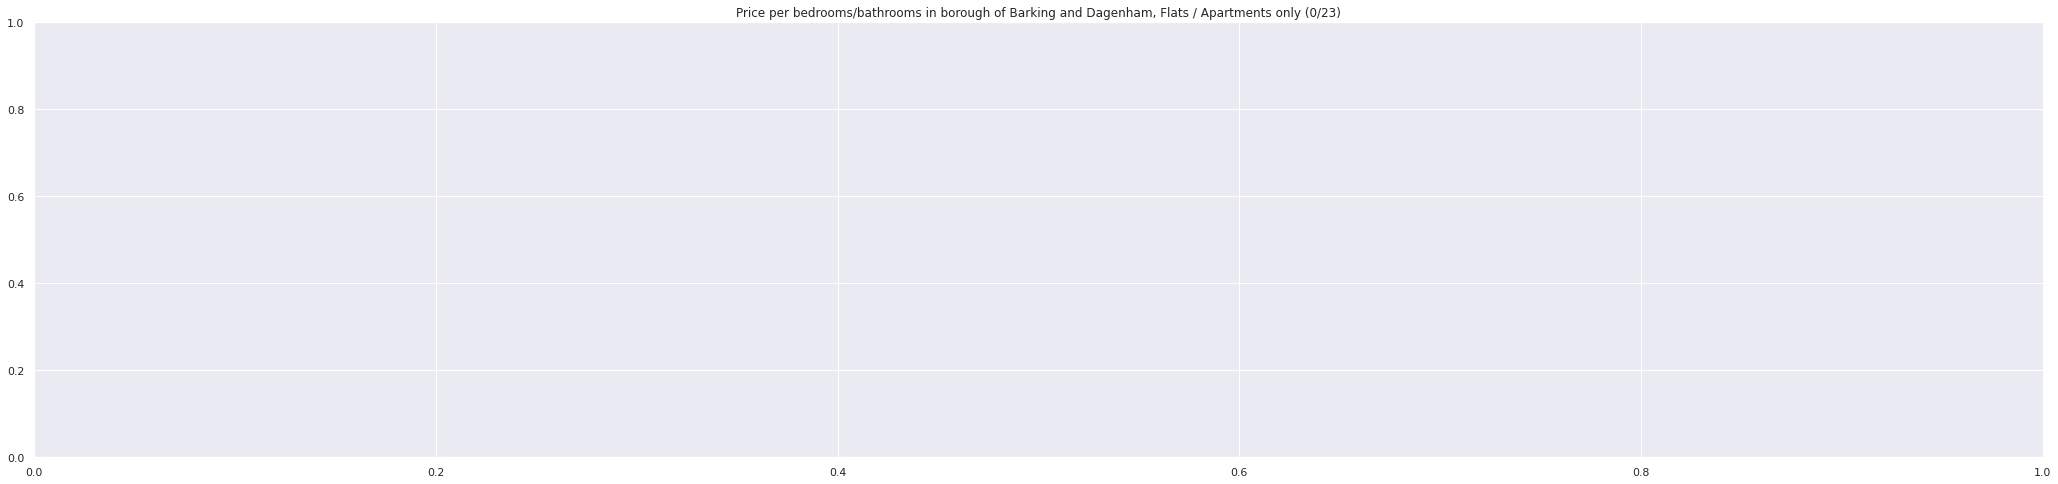

borough_name  analyticsProperty.propertyType
Islington     Flats / Apartments                82
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


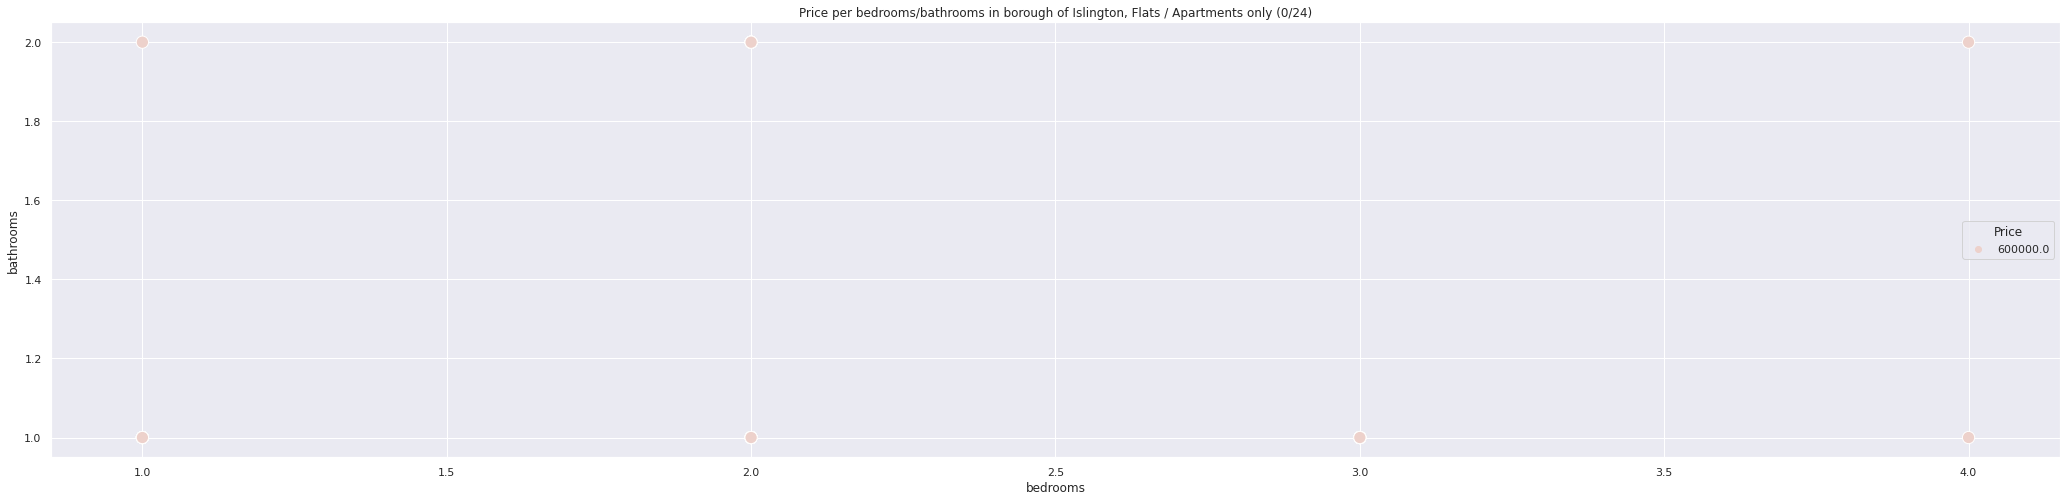

borough_name    analyticsProperty.propertyType
City of London  Flats / Apartments                30
dtype: int64


/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


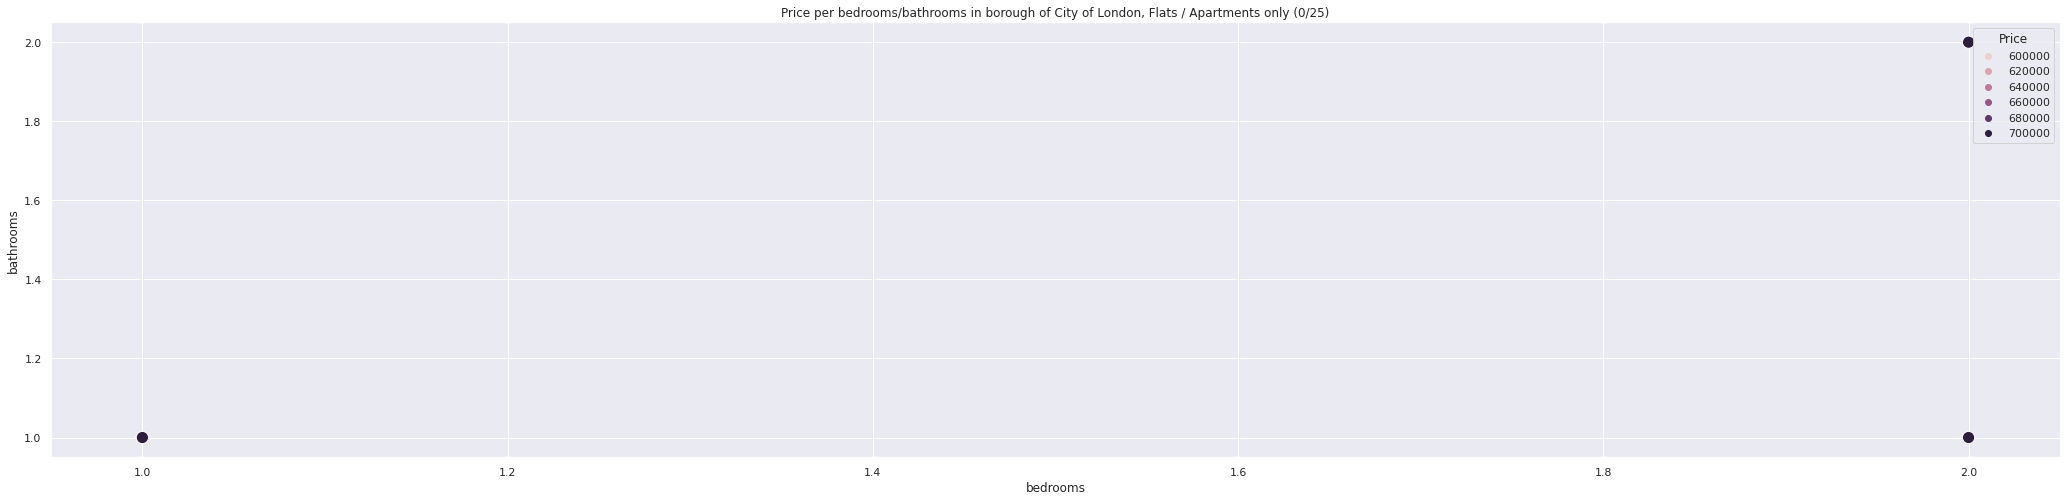

In [11]:
i = (i + 1) % len(propertyType_names)
#for h in range(len(borough_names)):
for h in range(len(borough_names)):
    df_by_borough = df.loc[(df['borough_name'] == borough_names[h]) & (df['analyticsProperty.propertyType'] == propertyType_names[i]), :]
    print(df_by_borough[['borough_name', 'analyticsProperty.propertyType']].value_counts())
    #df_by_borough.plot(kind="scatter", x=selected_feature, y="Price",title=f"Price per {selected_feature} in borough of {borough_names[h]}, {propertyType_names[i]} only ({i}/{h})")
    sns.scatterplot(selected_features[0], selected_features[1], hue='Price', data=df_by_borough, s=150).\
        set(title=f"Price per {selected_features[0]}/{selected_features[1]} in borough of {borough_names[h]}, {propertyType_names[i]} only ({i}/{h})")

    plt.show()


In [12]:
df['borough_name'].value_counts()

Newham                    1886
Croydon                   1735
Tower Hamlets             1698
Southwark                 1582
Lambeth                   1518
Wandsworth                1512
Ealing                    1270
Waltham Forest            1244
Lewisham                  1218
Redbridge                 1218
Kingston upon Thames      1071
Richmond upon Thames      1064
Hounslow                  1060
Sutton                    1035
Merton                    1002
Hillingdon                 773
Westminster                684
Greenwich                  587
Havering                   539
Kensington and Chelsea     483
Enfield                    432
Bexley                     196
Barnet                     124
Barking and Dagenham        94
Islington                   84
City of London              30
Name: borough_name, dtype: int64